## Porto Seguro’s Safe Driver Prediction

<br><font color=blue>The aim of this compitation is to predict probability that a driver will intiate an auto insurance claim next year.A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers. </font>


**Steps**

1. [Read data set](#Read-data-set)
2. [Explore data set](#Explore-data-set)
3. [Correlation plot](#Correlation-plot)
4. [Missing value is data set](#Missing-value-is-data-set)
5. [Convert variables into category type](#Convert-variables-into-category-type)
6. [Univariate analysis](#Univariate-analysis)
7. [Descrictive Statistic Features](#Descrictive-Statistic-Features)
8. [Determine outliers in dataset](#Determine-outliers-in-dataset)
9. [One Hot Encoding](#One-Hot-Encoding)
10. [Split data set](#Split-data-set)
11. [Hyperparameter tuning](#Hyperparameter-tuning)
12. [Logistic Regression model](#Logistic-Regression-model)
13. [Model performance](#Model-performance)
14. [Reciever Operating Charactaristics](#Reciever-Operating-Charactaristics)
15. [Predict for unseen data set](#Predict-for-unseen-data-set)

## Import library

In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import missingno as mssno
seed =45
% matplotlib inline

## Read data set

In [2]:
#path = '../input/'
path = 'dataset/'
train = pd.read_csv(path+'train.csv',na_values=-1)
test = pd.read_csv(path+'test.csv',na_values=-1)
print('Number rows and columns:',train.shape)
print('Number rows and columns:',test.shape)

Number rows and columns: (595212, 59)
Number rows and columns: (892816, 58)


Porto Seguro provided close to 600k and 900k observation of train and test dataset respectively. They were 57 feature anonymized in order to protect company trade secrets, but they were given bit informaation about  The train and test data set contains feature with similar grouping are tagged with (e.g., ind, reg, car, cat, calc, bin). Values of  -1 indicate that the feature was missing from the observation.

## Explore data set

In [3]:
train.head(3).T

,0,1,2
id,7.000000,9.000000,13.000000
target,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000
ps_ind_02_cat,2.000000,1.000000,4.000000
ps_ind_03,5.000000,7.000000,9.000000
ps_ind_04_cat,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000
ps_ind_07_bin,1.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000


## Target varaiable

0    573518
1     21694
Name: target, dtype: int64

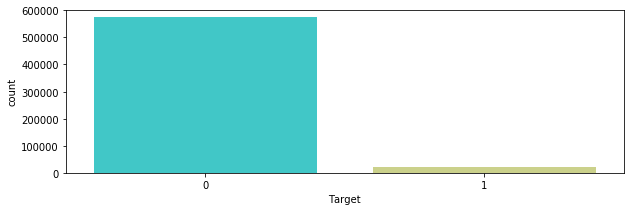

In [4]:
plt.figure(figsize=(10,3))
sns.countplot(train['target'],palette='rainbow')
plt.xlabel('Target')

train['target'].value_counts()

The 'target' variable in imbalanced. The target column in data set is whether or not claim was filed for that policy holder. The target variable is quite unbalanced, with only  %4 of  policyholders in training data filing claim within the year.

## Correlation plot
Correlation is a measure bivariate analysis that measure the strength of assciation between variable and direction of relationship.In terms of strength of relationship, the value of the correlation coefficient varies between +1 and -1

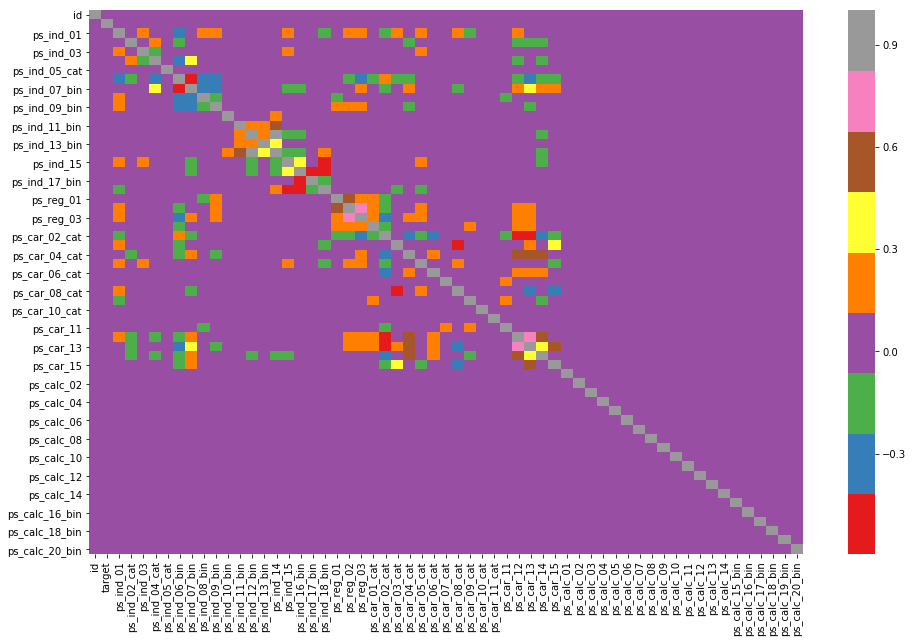

In [5]:
cor = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor,cmap='Set1')

> The correlation coefficient for **ps_calc** is 0,so we will drop these from our dataset.

In [6]:
ps_cal = train.columns[train.columns.str.startswith('ps_calc')] 
train = train.drop(ps_cal,axis =1)
test = test.drop(ps_cal,axis=1)
train.shape

(595212, 39)

## Missing value is data set
>Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

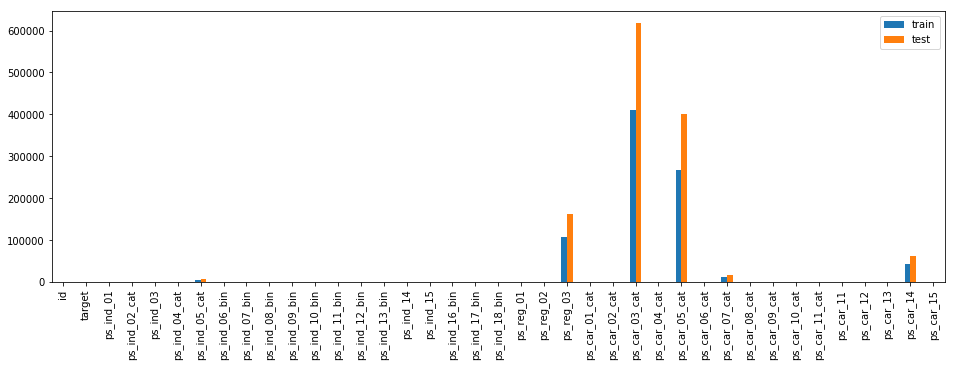

In [7]:
k= pd.DataFrame()
k['train']= train.isnull().sum()
k['test'] = test.isnull().sum()
fig,ax = plt.subplots(figsize=(16,5))
k.plot(kind='bar',ax=ax)

Missing value in test train data set are in same propotion and same column

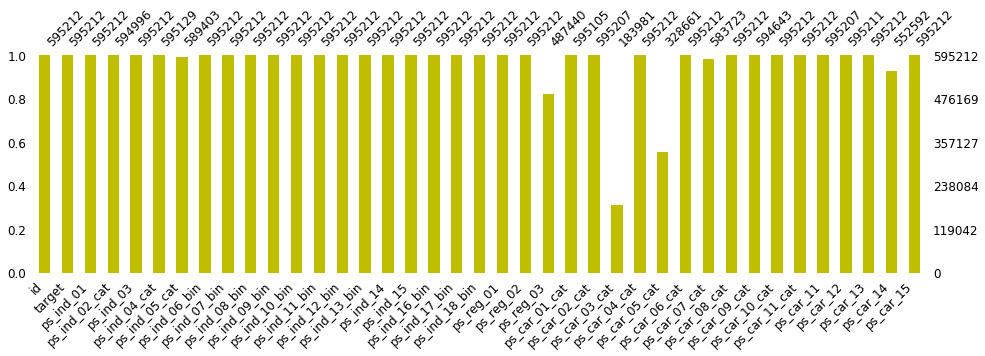

In [8]:
mssno.bar(train,color='y',figsize=(16,4),fontsize=12)

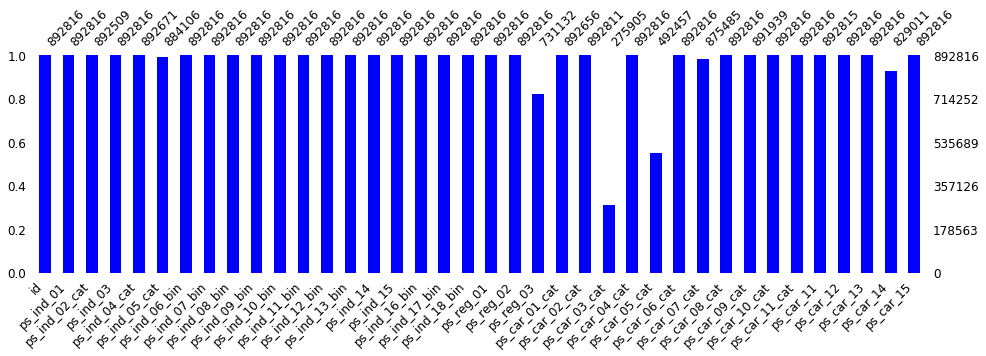

In [9]:
mssno.bar(test,color='b',figsize=(16,4),fontsize=12)

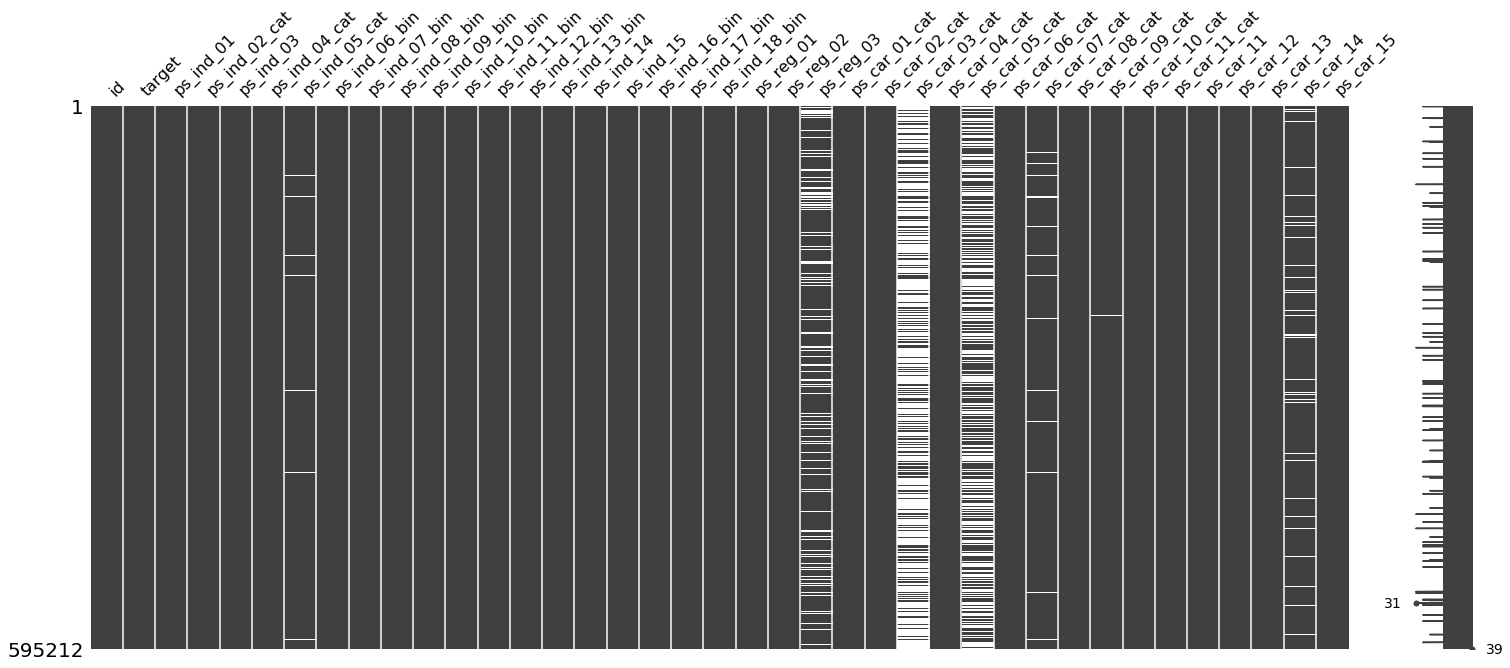

In [10]:
mssno.matrix(train)

### Replace missing value with mode

In [27]:
def missing_value(df):
    col = df.columns
    for i in col:
        if df[i].isnull().sum()>0:
            df[i].fillna(df[i].mode()[0],inplace=True)

In [12]:
missing_value(train)
missing_value(test)

## Convert variables into category type

In [13]:
def basic_details(df):
    b = pd.DataFrame()
    #b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(train)

,N unique value,dtype
id,595212,int64
target,2,int64
ps_ind_01,8,int64
ps_ind_02_cat,4,float64
ps_ind_03,12,int64
ps_ind_04_cat,2,float64
ps_ind_05_cat,7,float64
ps_ind_06_bin,2,int64
ps_ind_07_bin,2,int64
ps_ind_08_bin,2,int64


>The unique value of "ps_car_11_cat" is maximum in the data set is 104

In [14]:
def category_type(df):
    col = df.columns
    for i in col:
        if df[i].nunique()<=104:
            df[i] = df[i].astype('category')
category_type(train)
category_type(test)

# Univariate analysis

In [28]:
cat_col = [col for col in train.columns if '_cat' in col]
print(cat_col)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


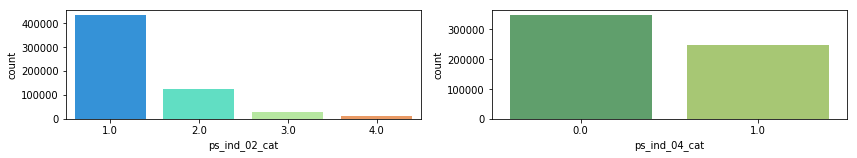

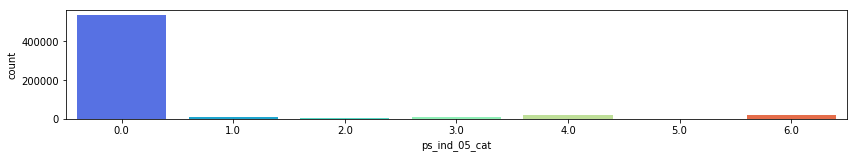

In [20]:
fig ,ax = plt.subplots(1,2,figsize=(14,2))
ax1,ax2, = ax.flatten()
sns.countplot(train['ps_ind_02_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_04_cat'],palette='summer',ax=ax2)
fig,ax = plt.subplots(figsize=(14,2))
sns.countplot(train['ps_ind_05_cat'],palette='rainbow',ax=ax)

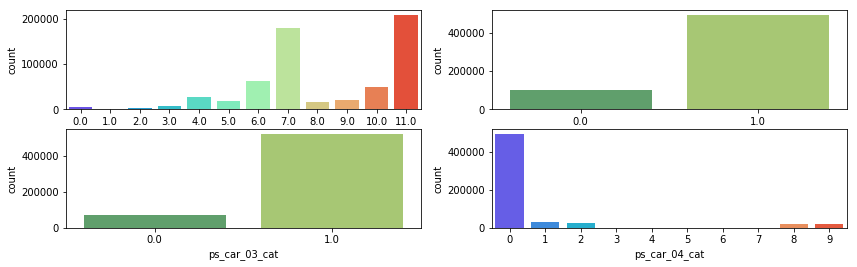

In [22]:
fig,ax = plt.subplots(2,2,figsize=(14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_01_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_02_cat'],palette='summer',ax=ax2)
sns.countplot(train['ps_car_03_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_04_cat'],palette='rainbow',ax=ax4)

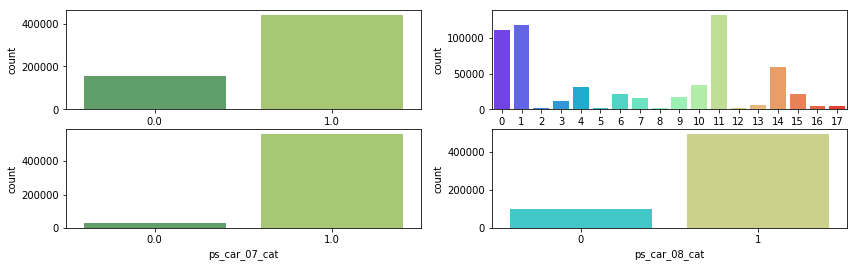

In [23]:
fig,ax = plt.subplots(2,2,figsize = (14,4))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(train['ps_car_05_cat'],palette='summer',ax=ax1)
sns.countplot(train['ps_car_06_cat'],palette='rainbow',ax=ax2)
sns.countplot(train['ps_car_07_cat'],palette='summer',ax=ax3)
sns.countplot(train['ps_car_08_cat'],palette='rainbow',ax=ax4)


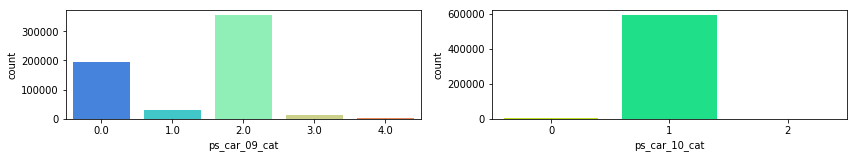

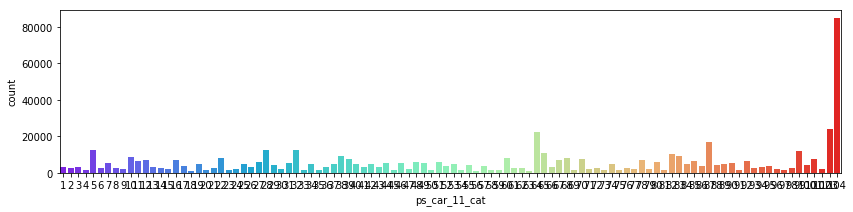

In [25]:
fig, ax = plt.subplots(1,2,figsize=(14,2))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_car_09_cat'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_car_10_cat'],palette='gist_rainbow',ax=ax2)
fig,ax = plt.subplots(figsize=(14,3))
sns.countplot(train['ps_car_11_cat'],palette='rainbow',ax=ax)

In [26]:
bin_col = [col for col in train.columns if 'bin' in col]
print(bin_col)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']


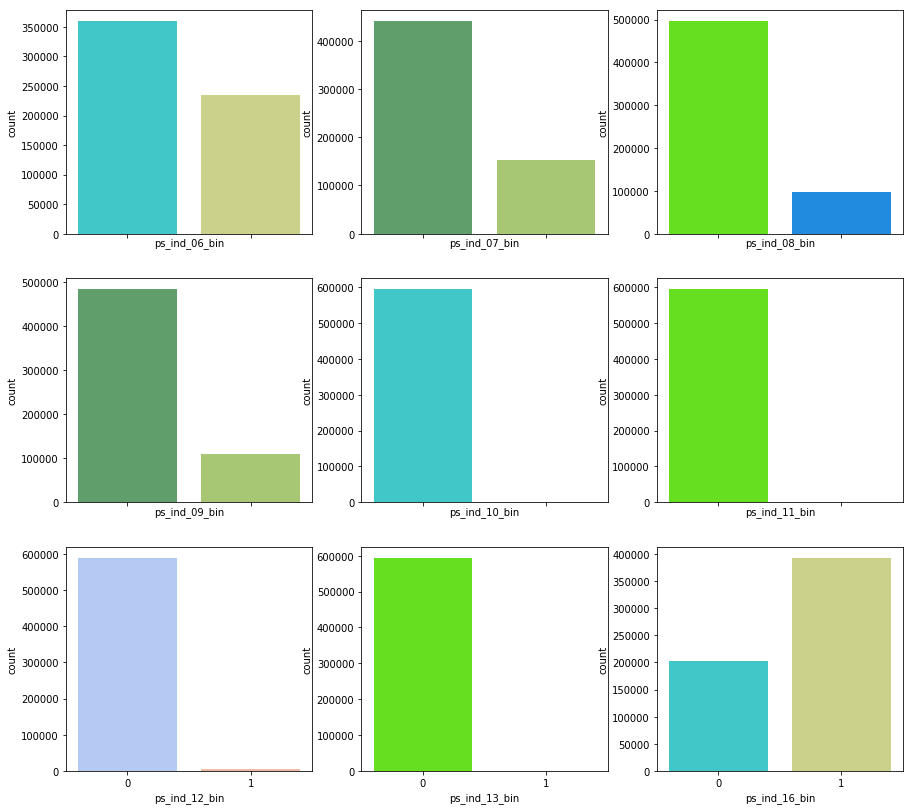

In [29]:
fig,ax = plt.subplots(3,3,figsize=(15,14),sharex='all')
ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9 = ax.flatten()
sns.countplot(train['ps_ind_06_bin'],palette='rainbow',ax=ax1)
sns.countplot(train['ps_ind_07_bin'],palette='summer',ax=ax2)
sns.countplot(train['ps_ind_08_bin'],palette='gist_rainbow',ax=ax3)
sns.countplot(train['ps_ind_09_bin'],palette='summer',ax=ax4)
sns.countplot(train['ps_ind_10_bin'],palette='rainbow',ax=ax5)
sns.countplot(train['ps_ind_11_bin'],palette='gist_rainbow',ax=ax6)
sns.countplot(train['ps_ind_12_bin'],palette='coolwarm',ax=ax7)
sns.countplot(train['ps_ind_13_bin'],palette='gist_rainbow',ax=ax8)
sns.countplot(train['ps_ind_16_bin'],palette='rainbow',ax=ax9)

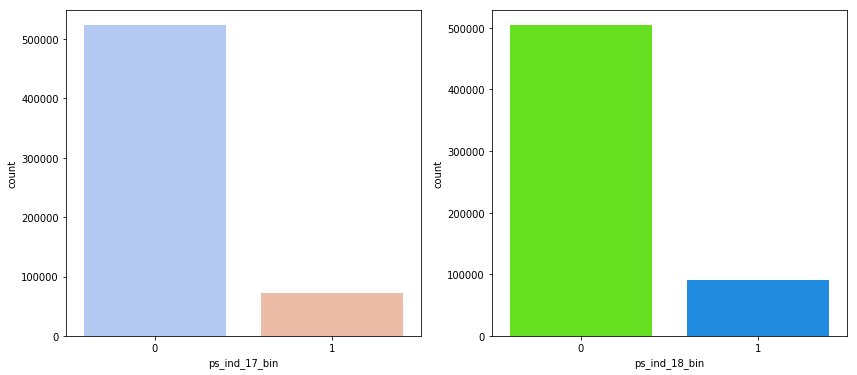

In [30]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
ax1,ax2 = ax.flatten()
sns.countplot(train['ps_ind_17_bin'],palette='coolwarm',ax=ax1)
sns.countplot(train['ps_ind_18_bin'],palette='gist_rainbow',ax=ax2)

In [31]:
tot_cat_col = list(train.select_dtypes(include=['category']).columns)

other_cat_col = [c for c in tot_cat_col if c not in cat_col+ bin_col]
other_cat_col

['target',
 'ps_ind_01',
 'ps_ind_03',
 'ps_ind_14',
 'ps_ind_15',
 'ps_reg_01',
 'ps_reg_02',
 'ps_car_11',
 'ps_car_15']

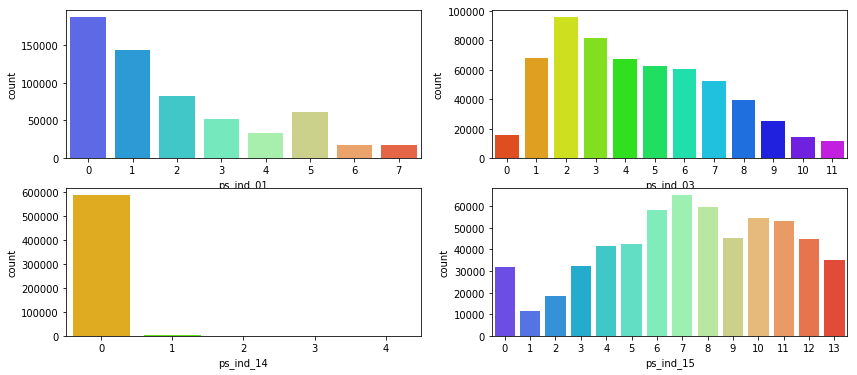

In [32]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.countplot(data=train,x='ps_ind_01',palette='rainbow',ax=ax1)
sns.countplot(data=train,x='ps_ind_03',palette='gist_rainbow',ax=ax2)
sns.countplot(data=train,x='ps_ind_14',palette='gist_rainbow',ax=ax3)
sns.countplot(data=train,x='ps_ind_15',palette='rainbow',ax=ax4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

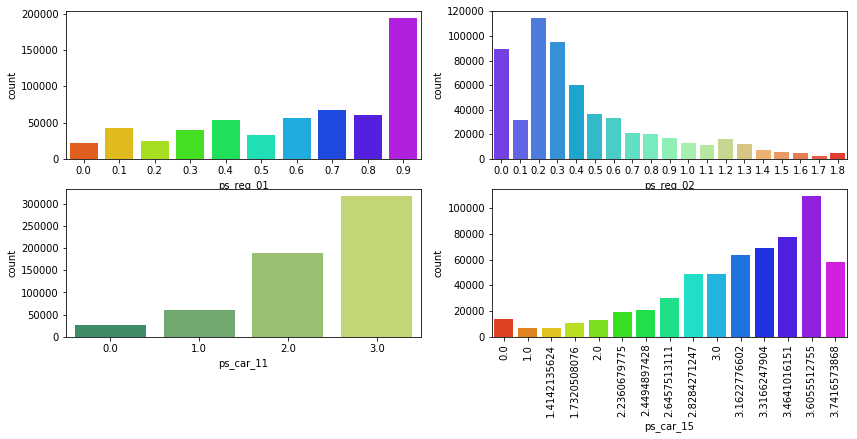

In [33]:
fig,ax = plt.subplots(2,2,figsize=(14,6))
ax1,ax2,ax3,ax4 =ax.flatten()
sns.countplot(data=train,x='ps_reg_01',palette='gist_rainbow',ax=ax1)
sns.countplot(data=train,x='ps_reg_02',palette='rainbow',ax=ax2)
sns.countplot(data=train,x='ps_car_11',palette='summer',ax=ax3)
sns.countplot(data=train,x='ps_car_15',palette='gist_rainbow',ax=ax4)
plt.xticks(rotation=90)

In [34]:
num_col = [c for c in train.columns if c not in tot_cat_col]
num_col.remove('id')
num_col

['ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14']

In [35]:
train['ps_reg_03'].describe()

count    595212.000000
mean          0.846950
std           0.328237
min           0.061237
25%           0.633936
50%           0.720677
75%           1.000000
max           4.037945
Name: ps_reg_03, dtype: float64

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


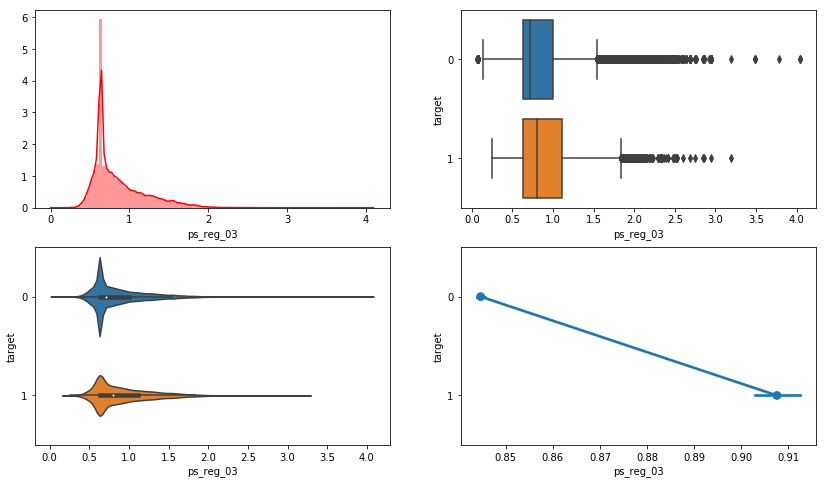

In [36]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_reg_03'],bins=100,color='red',ax=ax1)
sns.boxplot(x ='ps_reg_03',y='target',data=train,ax=ax2)
sns.violinplot(x ='ps_reg_03',y='target',data=train,ax=ax3)
sns.pointplot(x= 'ps_reg_03',y='target',data=train,ax=ax4)

ps_reg_03 has outlier data points

In [37]:
train['ps_car_12'].describe()

count    595212.000000
mean          0.379947
std           0.058300
min           0.100000
25%           0.316228
50%           0.374166
75%           0.400000
max           1.264911
Name: ps_car_12, dtype: float64

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


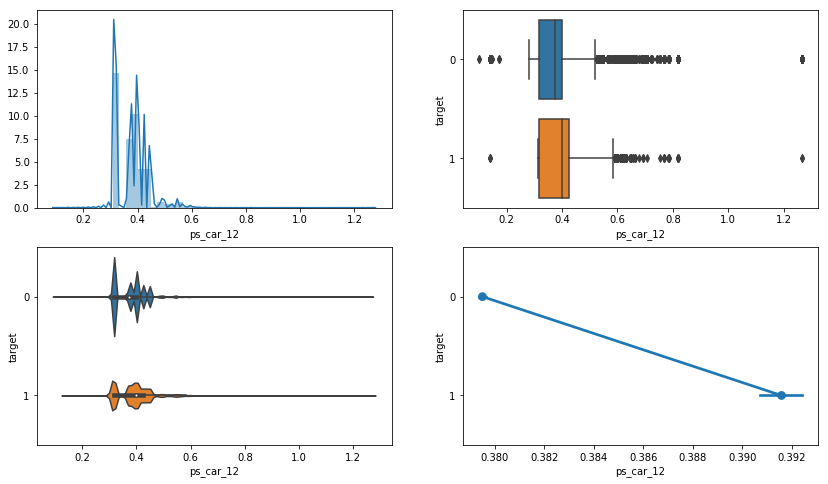

In [38]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_12'],bins=50,ax=ax1)
sns.boxplot(x='ps_car_12',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_12',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_12',y='target',data=train,ax=ax4)

In [39]:
train['ps_car_13'].describe()

count    595212.000000
mean          0.813265
std           0.224588
min           0.250619
25%           0.670867
50%           0.765811
75%           0.906190
max           3.720626
Name: ps_car_13, dtype: float64

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


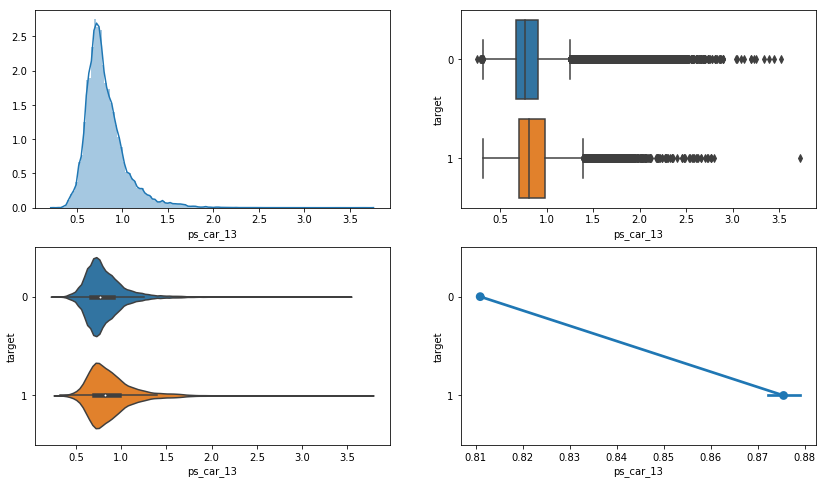

In [40]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_13'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_13',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_13',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_13',y='target',data=train,ax=ax4)

In [41]:
train['ps_car_14'].describe()

count    595212.000000
mean          0.373748
std           0.044078
min           0.109545
25%           0.353553
50%           0.368782
75%           0.396485
max           0.636396
Name: ps_car_14, dtype: float64

/home/sudhir/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


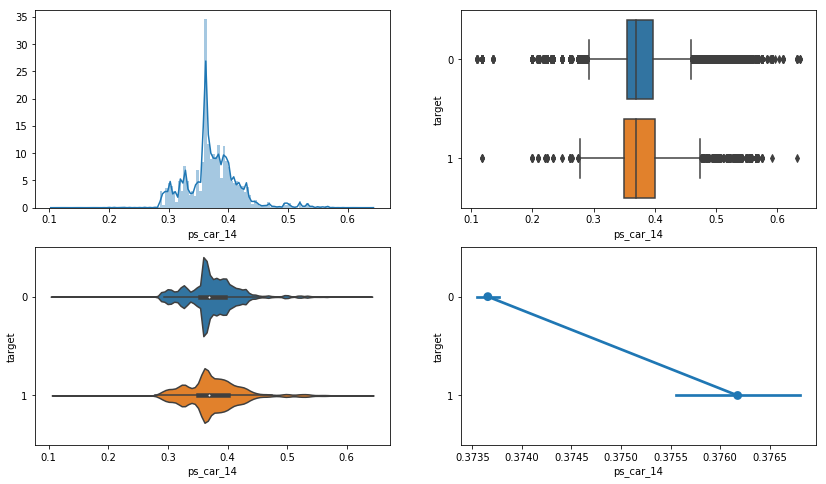

In [42]:
fig,ax = plt.subplots(2,2,figsize=(14,8))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(train['ps_car_14'],bins=120,ax=ax1)
sns.boxplot(x='ps_car_14',y='target',data=train,ax=ax2)
sns.violinplot(x='ps_car_14',y='target',data=train,ax=ax3)
sns.pointplot(x='ps_car_14',y='target',data=train,ax=ax4)

## Descrictive Statistic Features

In [39]:
def descrictive_stat_feat(df):
    df = pd.DataFrame(df)
    dcol= [c for c in train.columns if train[c].nunique()>5]
    dcol.remove('id')   
    d_median = df[dcol].median(axis=0)
    d_mean = df[dcol].mean(axis=0)
    q1 = df[dcol].apply(np.float32).quantile(0.25)
    q3 = df[dcol].apply(np.float32).quantile(0.75)
    
    #Add mean and median column to data set having more then 2 categories
    for c in dcol:
        df[c+str('_median_range')] = (df[c].astype(np.float32).values > d_median[c]).astype(np.int8)
        df[c+str('_mean_range')] = (df[c].astype(np.float32).values > d_mean[c]).astype(np.int8)
        df[c+str('_q1')] = (df[c].astype(np.float32).values < q1[c]).astype(np.int8)
        df[c+str('_q3')] = (df[c].astype(np.float32).values > q3[c]).astype(np.int8)
    return df

In [40]:
train = descrictive_stat_feat(train)
test = descrictive_stat_feat(test)

## Correlation plot

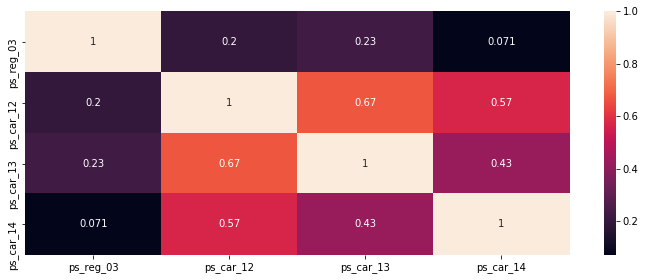

In [43]:
cor = train[num_col].corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor,annot=True)
plt.tight_layout()

## Determine outliers in dataset
The extreme observations in data set which resembles completely different behavoir from the rest of data point are called outliers. The outliers present in numeric feature are replaced by 1%/99% of feature.

In [44]:
def outlier(df,columns):
    for i in columns:
        quartile_1,quartile_3 = np.percentile(df[i],[25,75])
        quartile_f,quartile_l = np.percentile(df[i],[1,99])
        IQR = quartile_3-quartile_1
        lower_bound = quartile_1 - (1.5*IQR)
        upper_bound = quartile_3 + (1.5*IQR)
        print(i,lower_bound,upper_bound,quartile_f,quartile_l)
                
        df[i].loc[df[i] < lower_bound] = quartile_f
        df[i].loc[df[i] > upper_bound] = quartile_l
        
outlier(train,num_col)
outlier(test,num_col) 

ps_reg_03 0.08484029175000007 1.54909582495 0.4183300133000001 1.8521946442


/home/sudhir/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.31788087655 1.2591761161500001 0.44830050977400004 1.6176168955090011
ps_car_14 0.2891566484999999 0.4608812941000002 0.2887905816 0.5234500931
ps_reg_03 0.08156262285000004 1.55455860645 0.41907636539999993 1.8521946442
ps_car_12 0.19056941500000002 0.525658351 0.3155946768 0.5656854249000001
ps_car_13 0.3188870638624999 1.2584782365625 0.4485283558 1.6172399231399996
ps_car_14 0.2891566484999999 0.4608812941000002 0.2887905816 0.5234500931


## One Hot Encoding
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

In [45]:
def OHE(df1,df2,column):
    cat_col = column
    #cat_col = df.select_dtypes(include =['category']).columns
    len_df1 = df1.shape[0]
    
    df = pd.concat([df1,df2],ignore_index=True)
    c2,c3 = [],{}
    
    print('Categorical feature',len(column))
    for c in cat_col:
        if df[c].nunique()>2 :
            c2.append(c)
            c3[c] = 'ohe_'+c
    
    df = pd.get_dummies(df, prefix=c3, columns=c2,drop_first=True)

    df1 = df.loc[:len_df1-1]
    df2 = df.loc[len_df1:]
    print('Train',df1.shape)
    print('Test',df2.shape)
    return df1,df2

In [46]:
train1,test1 = OHE(train,test,tot_cat_col)

/home/sudhir/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Categorical feature 34
Train (595212, 257)
Test (892816, 257)


## Split data set

In [ ]:
X = train1.drop(['target','id'],axis=1)
y = train1['target'].astype('category')
x_test = test1.drop(['target','id'],axis=1)
del train1,test1

## Hyperparameter tuning 

In [ ]:
#Grid search
"""logreg = LogisticRegression(class_weight='balanced')
param = {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1]}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=3)
clf.fit(X,y)
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C'])) """

## Logistic Regression model
Logistic is suprevised algorithom used for discret type target variable. Unlike linear regression whose target varible is continues real number, logsitic regression transform transform target variable using sigmoid function to return probability value. If value predicted by the function is greater than 50% than it belong to class 1 or else 0.
Logistic regression is used for modelling. The data set is split using Stratified Kfold. In each split model is created and predicted using that model. The final predicted value is average of all model. 

In [ ]:
kf = StratifiedKFold(n_splits=5,random_state=seed,shuffle=True)
pred_test_full=0
cv_score=[]
i=1
for train_index,test_index in kf.split(X,y):    
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    lr = LogisticRegression(class_weight='balanced',C=0.003)
    lr.fit(xtr, ytr)
    pred_test = lr.predict_proba(xvl)[:,1]
    score = roc_auc_score(yvl,pred_test)
    print('roc_auc_score',score)
    cv_score.append(score)
    pred_test_full += lr.predict_proba(x_test)[:,1]
    i+=1

## Model performance

In [ ]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

## Reciever Operating Charactaristics

In [ ]:
proba = lr.predict_proba(xvl)[:,1]
fpr,tpr, threshold = roc_curve(yvl,proba)
auc_val = auc(fpr,tpr)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Charactaristics')
plt.plot(fpr,tpr,'b',label = 'AUC = %0.2f' % auc_val)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

## Predict for unseen data set

In [ ]:
y_pred = pred_test_full/5
submit = pd.DataFrame({'id':test['id'],'target':y_pred})
#submit.to_csv('lr_porto.csv.gz',index=False,compression='gzip') 
submit.to_csv('lr_porto.csv',index=False) 

In [ ]:
submit.head()

# Thank you for visiting